In [1]:
import pickle
import numpy as np
#
# Load np arrays (stored in a pickle file) from disk
#
pipeline_id = "A652_E-N_EI"
file = open("../data/datasets/" + pipeline_id + ".pickle", 'rb')
(X_train, y_train, min_y_train, max_y_train, 
 X_val, y_val, min_y_val, max_y_val, 
 X_test, y_test, min_y_test, max_y_test) = pickle.load(file)

In [2]:
X_train.shape, y_train.shape

((6751, 6, 23), (6751, 1))

In [3]:
X_train.reshape(6751, -1).shape

(6751, 138)

In [4]:
X_train2D = X_train.reshape(6751, -1)
X_train2D[0]

array([0.33070866, 0.30588235, 0.85869565, 0.43530943, 0.47745601,
       0.75      , 0.0669873 , 0.        , 0.3660535 , 0.65262158,
       0.43012276, 0.5747379 , 0.45036741, 0.39914207, 0.87445728,
       0.57240918, 0.57829098, 0.432517  , 0.54301394, 0.66054211,
       0.42500667, 0.86237235, 0.44717432, 0.35826772, 0.30882353,
       0.81521739, 0.41159642, 0.4359455 , 0.62940952, 0.01703709,
       0.        , 0.36256492, 0.64723808, 0.43334635, 0.6049703 ,
       0.55009321, 0.3796623 , 0.90670673, 0.55572111, 0.57116116,
       0.39991788, 0.53294886, 0.71968856, 0.39260728, 0.86383335,
       0.43876346, 0.35826772, 0.32058824, 0.86956522, 0.27965726,
       0.49823349, 0.5       , 0.        , 0.        , 0.34296157,
       0.69103694, 0.3957486 , 0.61372504, 0.60595273, 0.33330883,
       0.87512456, 0.57256289, 0.57352344, 0.36660069, 0.52698727,
       0.70668515, 0.39090863, 0.83717421, 0.4024541 , 0.37007874,
       0.33235294, 0.83695652, 0.48133856, 0.49933517, 0.37059

In [5]:
max_value_twod_row = np.amax(X_train2D, axis = 1)
max_value_twod_col = np.amax(X_train2D, axis = 0)

print("Row wise maximum: ", max_value_twod_row)
print("Column wise maximum: ", max_value_twod_col)

Row wise maximum:  [0.93814606 0.95385787 1.         ... 1.         1.         1.        ]
Column wise maximum:  [1.         0.97352941 1.         0.95516847 1.         1.
 1.         0.61842105 0.99783079 0.98312404 1.         0.98309288
 0.96949683 0.93222843 0.98565571 0.95299201 0.9639365  0.9698829
 0.9828184  0.96004603 0.97959913 1.         0.87097008 1.
 0.99117647 1.         1.         1.         1.         1.
 0.61842105 0.98674598 0.98312404 1.         1.         0.96949683
 0.92240559 0.98565571 0.96753682 0.9639365  0.99430039 0.97801586
 0.95429616 0.99204569 1.         0.87097008 0.91338583 1.
 1.         1.         1.         1.         1.         0.61513158
 0.96871224 0.98312404 0.94949834 1.         0.92295662 0.8907292
 0.98235558 0.96753682 0.9639365  0.9884789  0.96767843 0.95809567
 0.98886488 1.         0.87097008 0.91338583 1.         1.
 0.95516847 1.         1.         1.         1.         0.97450305
 0.98312404 0.92414565 1.         0.92295662 0.87795522 0.

In [6]:
min(y_train), max(y_train)

(array([0.00328947]), array([1.]))

In [8]:
import sys 
import os
sys.path.append(os.path.abspath("../src"))
import utils

In [4]:
import pandas as pd
df_a652 = pd.read_parquet(
        '../data/weather_stations/A652_1997_2022_preprocessed.parquet.gzip')

In [5]:
min(df_a652.index), max(df_a652.index)

(Timestamp('2007-05-18 18:00:00'), Timestamp('2021-12-31 23:00:00'))

In [6]:
df_a652.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   TEM_MAX   126502 non-null  float64
 1   PRE_MAX   126502 non-null  float64
 2   UMD_MAX   126502 non-null  float64
 3   wind_u    126502 non-null  float64
 4   wind_v    126502 non-null  float64
 5   hour_sin  126502 non-null  float64
 6   hour_cos  126502 non-null  float64
 7   CHUVA     126502 non-null  float64
dtypes: float64(8)
memory usage: 8.7 MB


In [28]:
df_a652[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TEM_MAX  126462 non-null  float64
 1   PRE_MAX  126467 non-null  float64
 2   UMD_MAX  122791 non-null  float64
 3   wind_u   117659 non-null  float64
 4   wind_v   117659 non-null  float64
 5   CHUVA    126502 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


In [17]:
df_a652['UMD_MAX'][100:150]

Datetime
2007-05-24 13:00:00    77.0
2007-05-24 14:00:00    86.0
2007-05-24 15:00:00    76.0
2007-05-24 16:00:00    70.0
2007-05-24 17:00:00    71.0
2007-05-24 18:00:00    73.0
2007-05-24 19:00:00    75.0
2007-05-24 20:00:00    72.0
2007-05-24 21:00:00    72.0
2007-05-24 22:00:00    69.0
2007-05-24 23:00:00    67.0
2007-05-25 00:00:00    69.0
2007-05-25 01:00:00    70.0
2007-05-25 02:00:00    70.0
2007-05-25 03:00:00    68.0
2007-05-25 04:00:00    71.0
2007-05-25 05:00:00    68.0
2007-05-25 06:00:00    70.0
2007-05-25 07:00:00    71.0
2007-05-25 08:00:00    69.0
2007-05-25 09:00:00    68.0
2007-05-25 10:00:00    72.0
2007-05-25 11:00:00    71.0
2007-05-25 12:00:00    69.0
2007-05-25 13:00:00    77.0
2007-05-25 14:00:00    65.0
2007-05-25 15:00:00    65.0
2007-05-25 16:00:00    63.0
2007-05-25 17:00:00    66.0
2007-05-25 18:00:00    67.0
2007-05-25 19:00:00    69.0
2007-05-25 20:00:00    73.0
2007-05-25 21:00:00    74.0
2007-05-25 22:00:00    76.0
2007-05-25 23:00:00    76.0
2007-05-26 

In [7]:
df_a652.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   TEM_MAX   126502 non-null  float64
 1   PRE_MAX   126502 non-null  float64
 2   UMD_MAX   126502 non-null  float64
 3   wind_u    126502 non-null  float64
 4   wind_v    126502 non-null  float64
 5   hour_sin  126502 non-null  float64
 6   hour_cos  126502 non-null  float64
 7   CHUVA     126502 non-null  float64
dtypes: float64(8)
memory usage: 8.7 MB


In [8]:
df_a652['2007-10-13':'2007-10-14']

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,hour_sin,hour_cos,CHUVA
2007-10-13 00:00:00,0.220472,0.285294,0.869565,0.339610,0.432589,0.500000,1.000000,0.0
2007-10-13 01:00:00,0.299213,0.285294,0.880435,0.382625,0.439746,0.629410,0.982963,0.0
2007-10-13 02:00:00,0.413386,0.279412,0.858696,0.384882,0.421158,0.750000,0.933013,0.0
2007-10-13 03:00:00,0.397638,0.273529,0.706522,0.433918,0.434616,0.853553,0.853553,0.0
2007-10-13 04:00:00,0.425197,0.273529,0.793478,0.448789,0.469091,0.933013,0.750000,0.0
2007-10-13 05:00:00,0.358268,0.261765,0.793478,0.341622,0.416350,0.982963,0.629410,0.0
2007-10-13 06:00:00,0.334646,0.238235,0.739130,0.350315,0.419686,1.000000,0.500000,0.0
2007-10-13 07:00:00,0.362205,0.238235,0.717391,0.439521,0.441841,0.982963,0.370590,0.0
2007-10-13 08:00:00,0.362205,0.250000,0.728261,0.409688,0.496590,0.933013,0.250000,0.0
2007-10-13 09:00:00,0.358268,0.261765,0.706522,0.352969,0.413199,0.853553,0.146447,0.0


In [9]:
df_nwp_era5 = pd.read_parquet(
            '../data/numerical_models/ERA5_A652_1997-01-01_2021-12-31_preprocessed.parquet.gzip')

In [13]:
df_nwp_era5['2007-10-13':'2007-10-14'].Geopotential_1000

Datetime
2007-10-13 00:00:00    0.302426
2007-10-13 01:00:00    0.297608
2007-10-13 02:00:00    0.279334
2007-10-13 03:00:00    0.271692
2007-10-13 04:00:00    0.277507
2007-10-13 05:00:00    0.284152
2007-10-13 06:00:00    0.293123
2007-10-13 07:00:00    0.320368
2007-10-13 08:00:00    0.333825
2007-10-13 09:00:00    0.355587
2007-10-13 10:00:00    0.357747
2007-10-13 11:00:00    0.358245
2007-10-13 12:00:00    0.347115
2007-10-13 13:00:00    0.326349
2007-10-13 14:00:00    0.307742
2007-10-13 15:00:00    0.300433
2007-10-13 16:00:00    0.303090
2007-10-13 17:00:00    0.296778
2007-10-13 18:00:00    0.310400
2007-10-13 19:00:00    0.321032
2007-10-13 20:00:00    0.338144
2007-10-13 21:00:00    0.358079
2007-10-13 22:00:00    0.366220
2007-10-13 23:00:00    0.383829
2007-10-14 01:00:00    0.375855
2007-10-14 02:00:00    0.373363
2007-10-14 03:00:00    0.385158
2007-10-14 04:00:00    0.392302
2007-10-14 05:00:00    0.413899
2007-10-14 06:00:00    0.432339
2007-10-14 07:00:00    0.453770

In [17]:
numerical_model_data_source = '../data/numerical_models/ERA5_A652_1997-01-01_2021-12-31.csv'
format_string = '%Y-%m-%d %H:%M:%S'
df_era5_csv = pd.read_csv(numerical_model_data_source)
df_era5_csv['Datetime'] = pd.to_datetime(df_era5_csv['time'], format=format_string)
df_era5_csv = df_era5_csv.set_index(pd.DatetimeIndex(df_era5_csv['Datetime']))
df_era5_csv['2007-10-13':'2007-10-14'].Geopotential_1000

Datetime
2007-10-13 00:00:00     720.50100
2007-10-13 01:00:00     736.44040
2007-10-13 02:00:00     748.99805
2007-10-13 03:00:00     710.35840
2007-10-13 04:00:00     696.35156
2007-10-13 05:00:00     643.22170
2007-10-13 06:00:00     621.00390
2007-10-13 07:00:00     637.90820
2007-10-13 08:00:00     657.22850
2007-10-13 09:00:00     683.31055
2007-10-13 10:00:00     762.52246
2007-10-13 11:00:00     801.64550
2007-10-13 12:00:00     864.91797
2007-10-13 13:00:00     871.19727
2007-10-13 14:00:00     872.64550
2007-10-13 15:00:00     840.28516
2007-10-13 16:00:00     779.91016
2007-10-13 17:00:00     725.81445
2007-10-13 18:00:00     704.56250
2007-10-13 19:00:00     712.29004
2007-10-13 20:00:00     693.93650
2007-10-13 21:00:00     733.54200
2007-10-13 22:00:00     764.45410
2007-10-13 23:00:00     814.20310
2007-10-14 00:00:00     872.16310
2007-10-14 01:00:00     895.83010
2007-10-14 02:00:00     947.02734
2007-10-14 03:00:00     923.84375
2007-10-14 04:00:00     916.59863
2007-

In [27]:
df = df_a652['2007-09-25':'2007-09-27']
df[df_a652.UMD_MAX.isnull()]

/tmp/ipykernel_2432/3203796971.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df_a652.UMD_MAX.isnull()]


,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,wind_u,wind_v
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-09-26 14:00:00,1023.3,20.2,-22.988333,NaN,288.8,15.6,NaN,-43.190556,NaN,NaN,...,0.6,NaN,NaN,12.9,NaN,21.0,18.9,81.0,-0.234439,0.552303


<AxesSubplot: title={'center': 'UMD_MAX'}, xlabel='Datetime'>

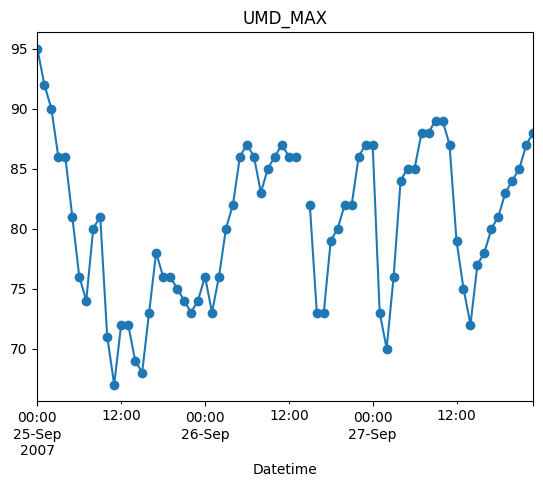

In [28]:
df['UMD_MAX'].plot(title="UMD_MAX", marker="o")

In [42]:
df_umd_missing = df_a652.UMD_MAX.isnull().astype(int).groupby(df_a652.UMD_MAX.notnull().astype(int).cumsum()).sum()

In [55]:
df_umd_missing[df_umd_missing > 0].shape

(157,)

In [59]:
df_umd_missing[df_umd_missing == 4].shape

(14,)

In [60]:
for i in range(7):
    print(df_umd_missing[df_umd_missing == i].shape)

(122634,)
(44,)
(24,)
(13,)
(14,)
(4,)
(7,)


In [54]:
df_a652.iloc[121730]

PRE_INS         1013.200000
TEM_SEN           19.900000
VL_LATITUDE      -22.988333
PRE_MAX         1013.300000
RAD_GLO           -2.400000
PTO_INS           14.600000
TEM_MIN           20.100000
VL_LONGITUDE     -43.190556
UMD_MIN           69.000000
PTO_MAX           15.600000
VEN_DIR           12.000000
CHUVA              0.000000
PRE_MIN         1013.100000
UMD_MAX           75.000000
VEN_VEL            1.800000
PTO_MIN           14.600000
TEM_MAX           20.600000
TEN_BAT           12.600000
VEN_RAJ            3.200000
TEM_CPU           21.000000
TEM_INS           20.600000
UMD_INS           69.000000
wind_u            -0.374241
wind_v            -1.760666
Name: 2021-06-16 02:00:00, dtype: float64

In [44]:
df_umd_missing[df_umd_missing > 6]

UMD_MAX
23874      38
24236      17
24239       8
24258      16
24909      28
24922      13
25117      12
25214       8
25228      36
25299      37
25994      12
26162      15
26230       8
26233      21
26250      19
26254     230
26259      10
26263       7
26270      80
26272      11
26296      27
26301      74
26304      21
26309      14
26313      41
26337      48
26339      19
26348     108
26378     157
26379      18
26426      33
26451      20
26528      53
26588      20
26603     137
26626      39
26634     149
26638      10
26649      31
26679     159
26683     362
26704      30
26705      42
26756     164
26757     214
26758     158
26763      93
26769     480
26773      74
105155     26
105237     15
Name: UMD_MAX, dtype: int64

<AxesSubplot: title={'center': 'UMD_MAX'}, xlabel='Datetime'>

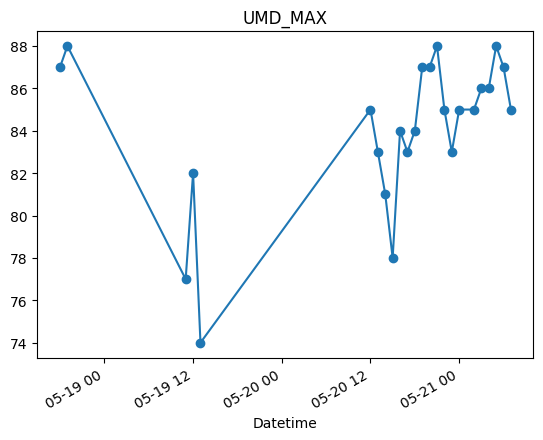

In [46]:
df_a652['UMD_MAX'][:24].plot(title="UMD_MAX", marker="o")

In [32]:
df_a652[df_a652.CHUVA > 0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11015 entries, 2007-05-23 16:00:00 to 2021-12-31 21:00:00
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRE_INS       11015 non-null  float64
 1   TEM_SEN       10432 non-null  float64
 2   VL_LATITUDE   11015 non-null  float64
 3   PRE_MAX       11009 non-null  float64
 4   RAD_GLO       9920 non-null   float64
 5   PTO_INS       10478 non-null  float64
 6   TEM_MIN       11009 non-null  float64
 7   VL_LONGITUDE  11015 non-null  float64
 8   UMD_MIN       10470 non-null  float64
 9   PTO_MAX       10473 non-null  float64
 10  VEN_DIR       10145 non-null  float64
 11  CHUVA         11015 non-null  float64
 12  PRE_MIN       11009 non-null  float64
 13  UMD_MAX       10483 non-null  float64
 14  VEN_VEL       10968 non-null  float64
 15  PTO_MIN       10467 non-null  float64
 16  TEM_MAX       11009 non-null  float64
 17  TEN_BAT       11015 non-null  floa

In [34]:
df_a652.describe()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,wind_u,wind_v
count,126502.000000,122417.000000,1.265020e+05,126467.000000,119600.000000,122845.000000,126462.000000,126502.000000,122776.000000,122766.000000,...,126073.000000,122759.000000,126462.00000,126502.000000,125999.000000,126502.000000,126498.000000,122848.000000,117659.000000,117659.000000
mean,1011.451502,22.781762,-2.298833e+01,1011.684394,723.796103,19.251937,22.948365,-43.190556,75.600907,19.750968,...,2.696388,18.767216,23.98270,12.956846,5.656151,25.367939,23.449409,78.043420,-0.371637,0.335305
std,4.790940,4.580786,7.105455e-15,4.771721,1083.892324,2.794178,2.880716,0.000000,11.900763,2.778483,...,2.138765,2.820460,3.27465,0.676457,3.196740,3.808637,3.079165,10.902007,3.084533,1.462664
min,994.700000,-2.700000,-2.298833e+01,994.800000,-3.500000,-9.200000,13.600000,-43.190556,14.000000,-2.200000,...,0.000000,-1.500000,14.30000,10.000000,0.000000,15.000000,14.300000,11.000000,-15.000000,-11.960672
25%,1008.000000,20.100000,-2.298833e+01,1008.300000,-1.600000,17.500000,20.900000,-43.190556,69.000000,18.000000,...,1.300000,17.000000,21.60000,12.500000,3.400000,23.000000,21.200000,72.000000,-1.980536,-0.514940
50%,1011.100000,23.100000,-2.298833e+01,1011.300000,32.000000,19.500000,22.700000,-43.190556,77.000000,19.900000,...,2.100000,19.000000,23.60000,12.600000,4.900000,25.000000,23.200000,79.000000,-0.612836,0.062819
75%,1014.700000,25.900000,-2.298833e+01,1014.900000,1215.925000,21.300000,24.800000,-43.190556,84.000000,21.700000,...,3.500000,20.800000,26.00000,13.500000,7.100000,28.000000,25.400000,86.000000,1.168432,0.957953
max,1028.800000,38.800000,-2.298833e+01,1028.800000,5308.300000,28.000000,37.800000,-43.190556,100.000000,32.900000,...,19.000000,26.900000,39.70000,14.500000,43.100000,41.000000,38.800000,100.000000,18.997106,12.623223


In [79]:
df_a652.columns

Index(['PRE_INS', 'TEM_SEN', 'VL_LATITUDE', 'PRE_MAX', 'RAD_GLO', 'PTO_INS',
       'TEM_MIN', 'VL_LONGITUDE', 'UMD_MIN', 'PTO_MAX', 'VEN_DIR', 'CHUVA',
       'PRE_MIN', 'UMD_MAX', 'VEN_VEL', 'PTO_MIN', 'TEM_MAX', 'TEN_BAT',
       'VEN_RAJ', 'TEM_CPU', 'TEM_INS', 'UMD_INS', 'wind_u', 'wind_v'],
      dtype='object')

In [80]:
df = df_a652[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']]
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TEM_MAX  126462 non-null  float64
 1   PRE_MAX  126467 non-null  float64
 2   UMD_MAX  122791 non-null  float64
 3   wind_u   117659 non-null  float64
 4   wind_v   117659 non-null  float64
 5   CHUVA    126502 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


In [76]:
df.describe()

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
count,126462.00000,126467.000000,122791.000000,117659.000000,117659.000000,126502.000000
mean,23.98270,1011.684394,80.327434,-0.371637,0.335305,0.131133
std,3.27465,4.771721,9.745510,3.084533,1.462664,1.061197
min,14.30000,994.800000,8.000000,-15.000000,-11.960672,0.000000
25%,21.60000,1008.300000,75.000000,-1.980536,-0.514940,0.000000
50%,23.60000,1011.300000,82.000000,-0.612836,0.062819,0.000000
75%,26.00000,1014.900000,87.000000,1.168432,0.957953,0.000000
max,39.70000,1028.800000,100.000000,18.997106,12.623223,71.600000


In [77]:
normalized_df.describe()

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
count,126462.000000,126467.000000,122791.000000,117659.000000,117659.000000,126502.000000
mean,0.381209,0.496600,0.786168,0.430283,0.500164,0.001831
std,0.128923,0.140345,0.105929,0.090729,0.059497,0.014821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.287402,0.397059,0.728261,0.382958,0.465578,0.000000
50%,0.366142,0.485294,0.804348,0.423188,0.489080,0.000000
75%,0.460630,0.591176,0.858696,0.475583,0.525491,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df[df.isnull().any(axis=1)]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-07-11 13:00:00,23.0,1013.4,79.0,NaN,NaN,0.0
2007-07-25 23:00:00,24.2,1009.7,80.0,NaN,NaN,0.0
2007-09-26 14:00:00,NaN,NaN,NaN,-0.234439,0.552303,0.6
2007-11-02 00:00:00,34.0,1002.5,89.0,NaN,NaN,0.0
2008-03-19 14:00:00,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2021-03-27 05:00:00,26.1,1009.7,87.0,NaN,NaN,0.0
2021-03-27 06:00:00,26.0,1009.0,87.0,NaN,NaN,0.0
2021-09-10 10:00:00,21.3,1012.4,95.0,NaN,NaN,0.0


In [9]:
df[df.isnull().any(axis=1) & (df.CHUVA == 0)]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-07-11 13:00:00,23.0,1013.4,79.0,NaN,NaN,0.0
2007-07-25 23:00:00,24.2,1009.7,80.0,NaN,NaN,0.0
2007-11-02 00:00:00,34.0,1002.5,89.0,NaN,NaN,0.0
2008-03-19 14:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2010-02-08 05:00:00,25.5,1006.1,NaN,-0.567311,-0.195341,0.0
...,...,...,...,...,...,...
2021-03-27 05:00:00,26.1,1009.7,87.0,NaN,NaN,0.0
2021-03-27 06:00:00,26.0,1009.0,87.0,NaN,NaN,0.0
2021-09-10 10:00:00,21.3,1012.4,95.0,NaN,NaN,0.0


In [11]:
df[df.isnull().any(axis=1) & (df.CHUVA > 0)]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-09-26 14:00:00,NaN,NaN,NaN,-0.234439,0.552303,0.6
2010-02-18 06:00:00,24.3,1009.7,NaN,4.822145,1.660398,1.0
2010-02-18 07:00:00,24.1,1009.4,NaN,6.598503,2.017365,0.2
2010-02-18 08:00:00,24.0,1010.3,NaN,5.161240,0.633721,0.2
2010-02-18 09:00:00,23.7,1010.7,NaN,4.134648,1.504889,0.4
...,...,...,...,...,...,...
2019-12-06 18:00:00,19.8,1007.1,NaN,1.995128,-0.139513,0.4
2019-12-07 01:00:00,19.8,1010.1,NaN,-0.390682,-1.134622,0.2
2019-12-11 00:00:00,21.6,1009.1,NaN,2.068096,-0.364661,2.6


In [81]:
normalized_df.head()

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-05-18 18:00:00,0.374016,0.450000,0.858696,0.535205,0.621124,0.0
2007-05-18 19:00:00,0.354331,0.458824,0.869565,0.572096,0.618026,0.0
2007-05-19 11:00:00,0.366142,0.541176,0.750000,0.434133,0.473530,0.0
2007-05-19 12:00:00,0.377953,0.550000,0.804348,0.415528,0.495381,0.0
2007-05-19 13:00:00,0.421260,0.561765,0.717391,0.539545,0.568231,0.0


In [82]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
normalized_df[:] = imputer.fit_transform(normalized_df)

In [83]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TEM_MAX  126502 non-null  float64
 1   PRE_MAX  126502 non-null  float64
 2   UMD_MAX  126502 non-null  float64
 3   wind_u   126502 non-null  float64
 4   wind_v   126502 non-null  float64
 5   CHUVA    126502 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


In [84]:
normalized_df.to_parquet('../data/weather_stations/A652_1997_2022_cleaned.parquet.gzip', compression='gzip')

In [85]:
min(normalized_df.index)

Timestamp('2007-05-18 18:00:00')

In [62]:
!pip install missingno

<AxesSubplot: >

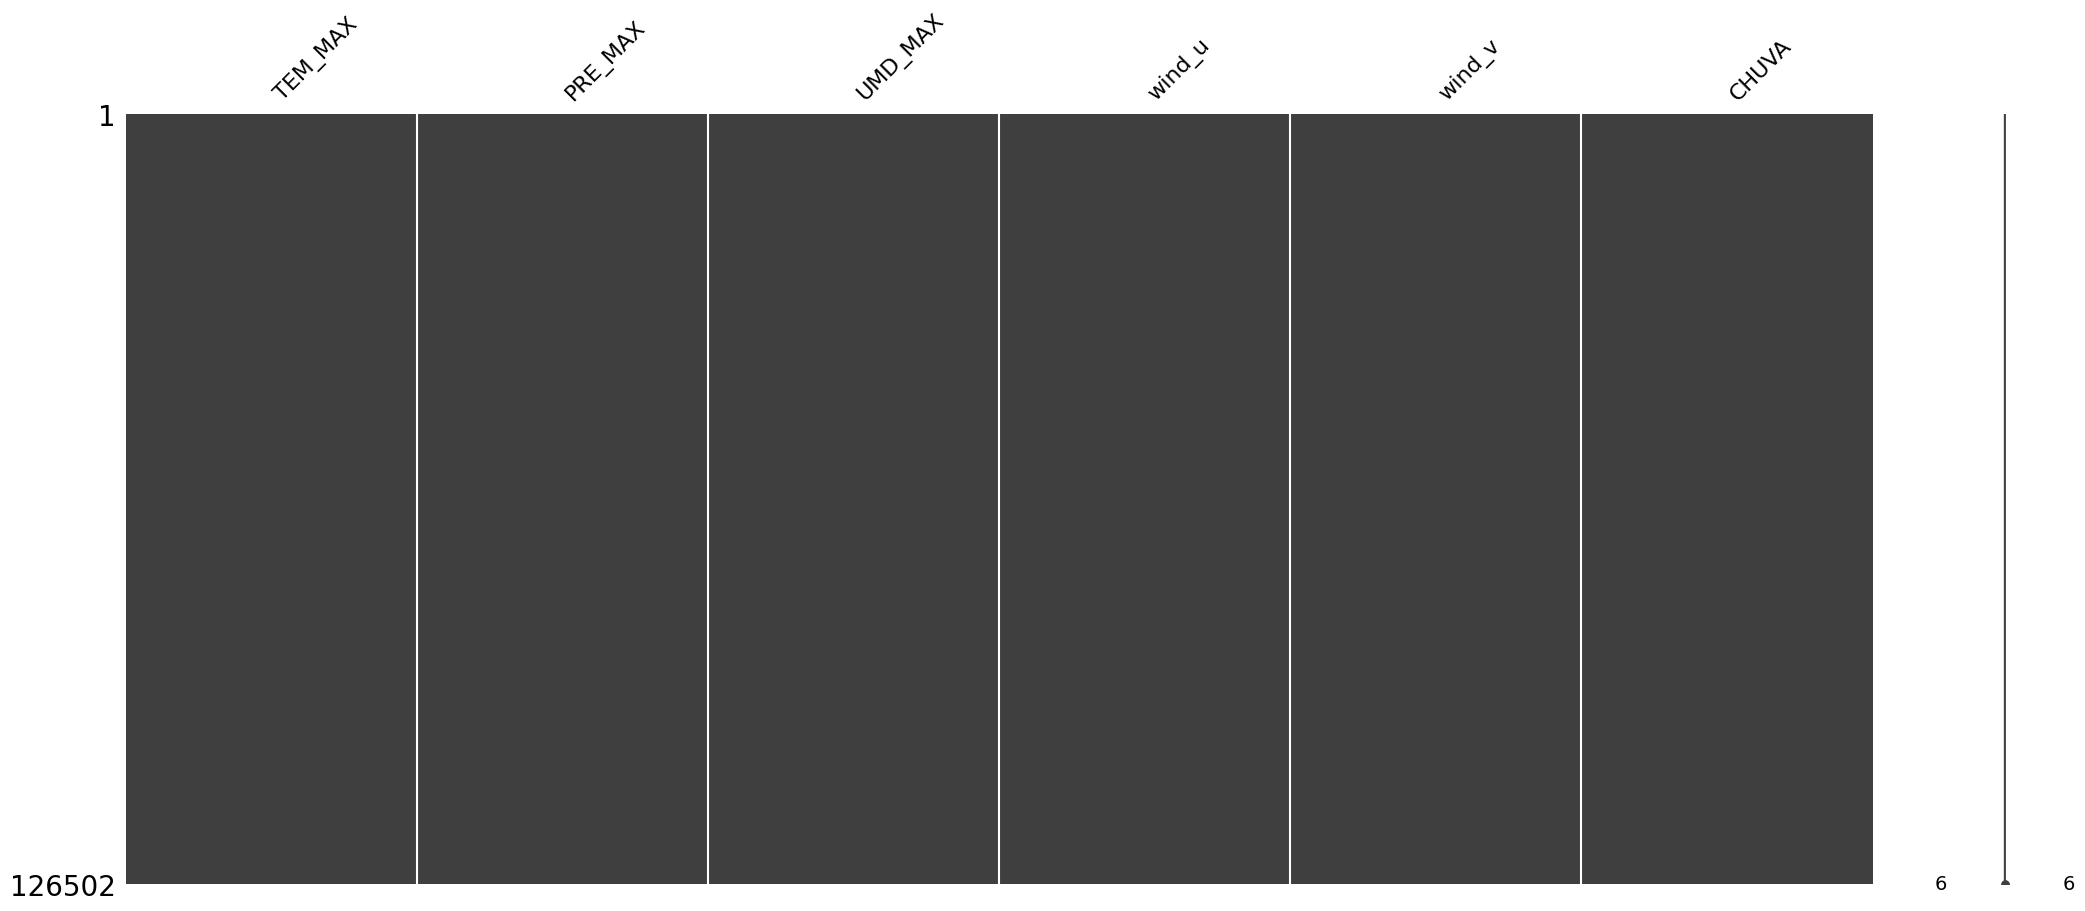

In [73]:
import missingno as msno

msno.matrix(normalized_df[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']])

In [74]:
normalized_df.describe()

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
count,126502.000000,126502.000000,126502.000000,126502.000000,126502.000000,126502.000000
mean,0.381198,0.496600,0.786893,0.436756,0.508892,0.001831
std,0.128915,0.140333,0.105221,0.093786,0.067591,0.014821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.287402,0.397059,0.728261,0.385871,0.467496,0.000000
50%,0.366142,0.485294,0.804348,0.426527,0.493197,0.000000
75%,0.460630,0.591176,0.858696,0.484525,0.537696,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

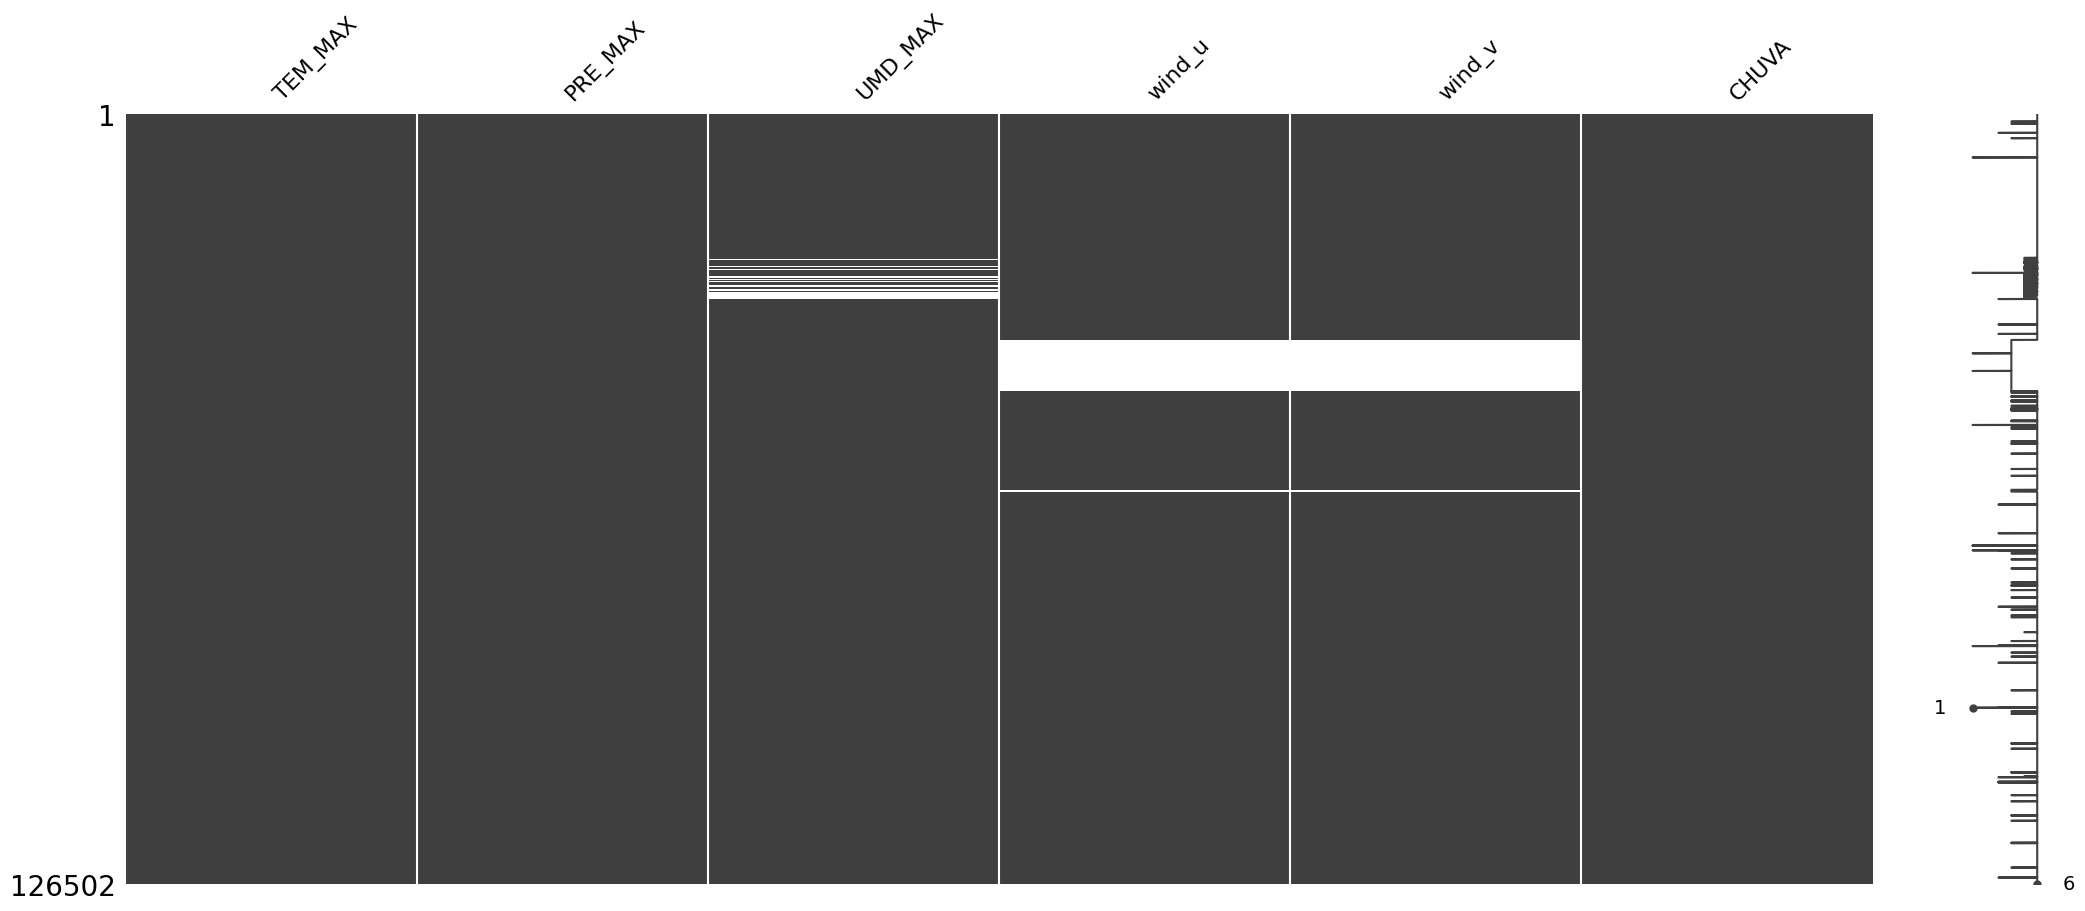

In [67]:
import missingno as msno

msno.matrix(df_a652[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']])

<AxesSubplot: >

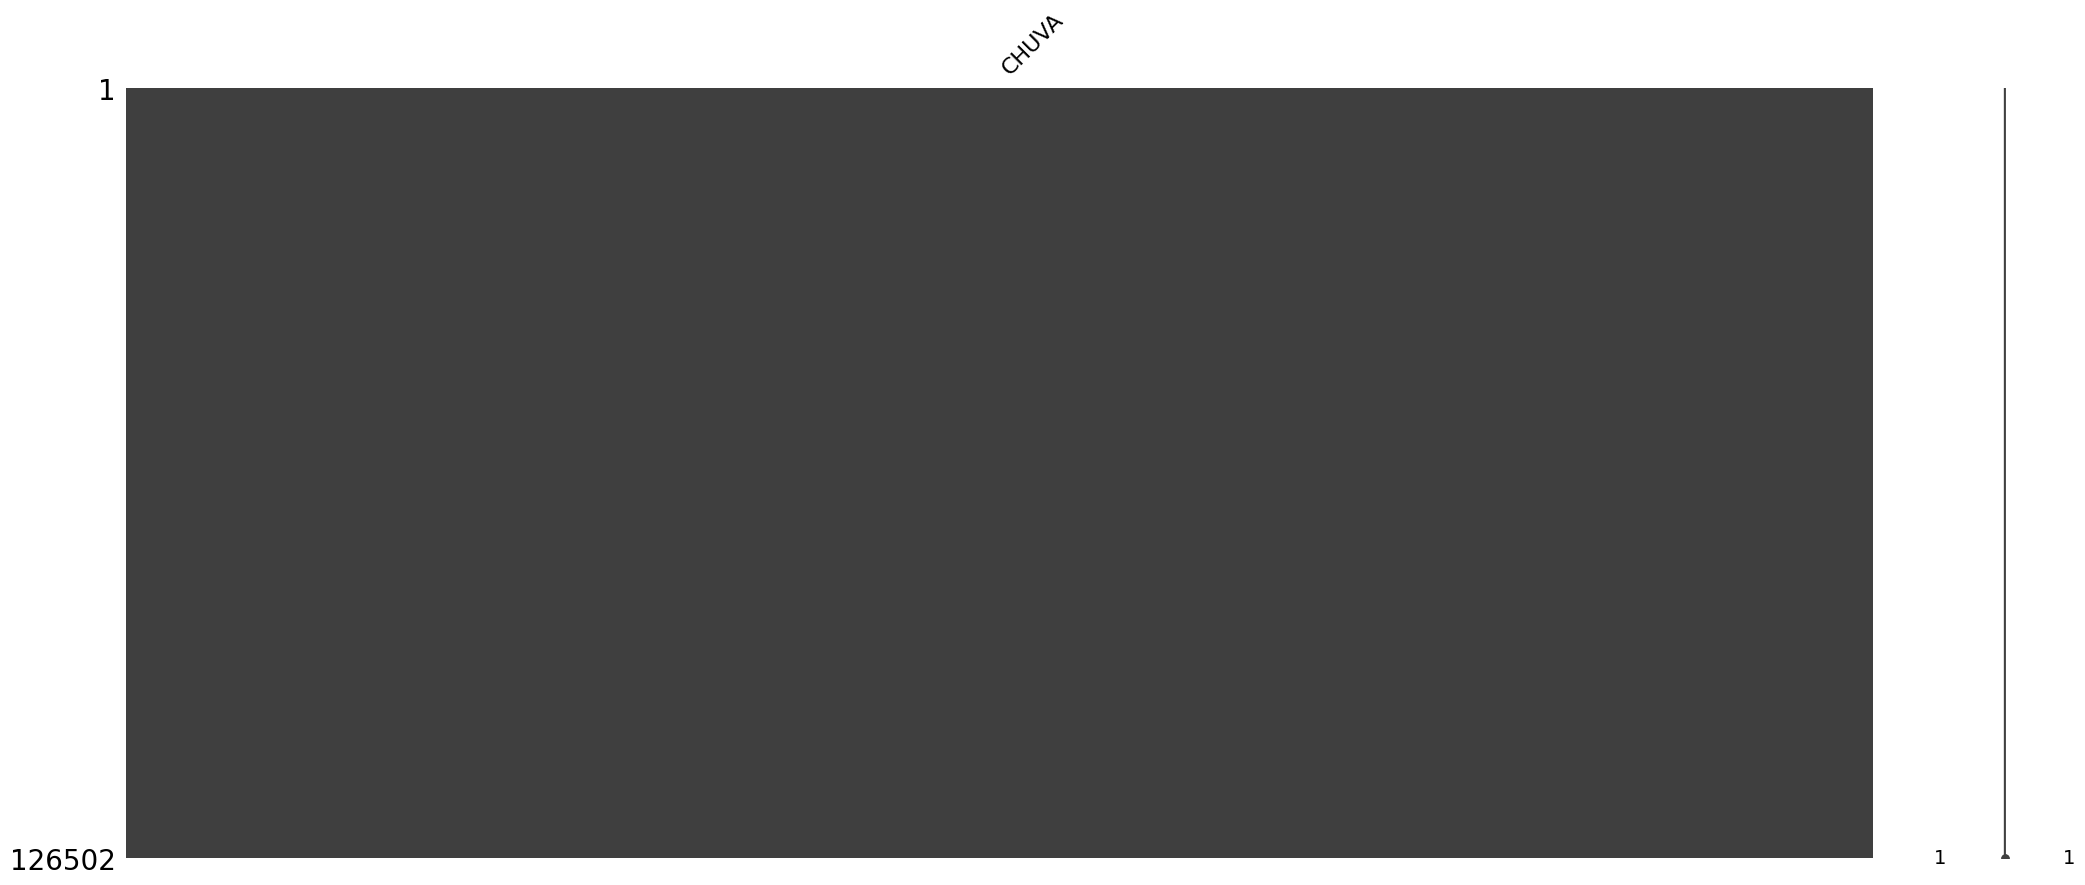

In [66]:
import missingno as msno

msno.matrix(df_a652[['CHUVA']])

<AxesSubplot: >

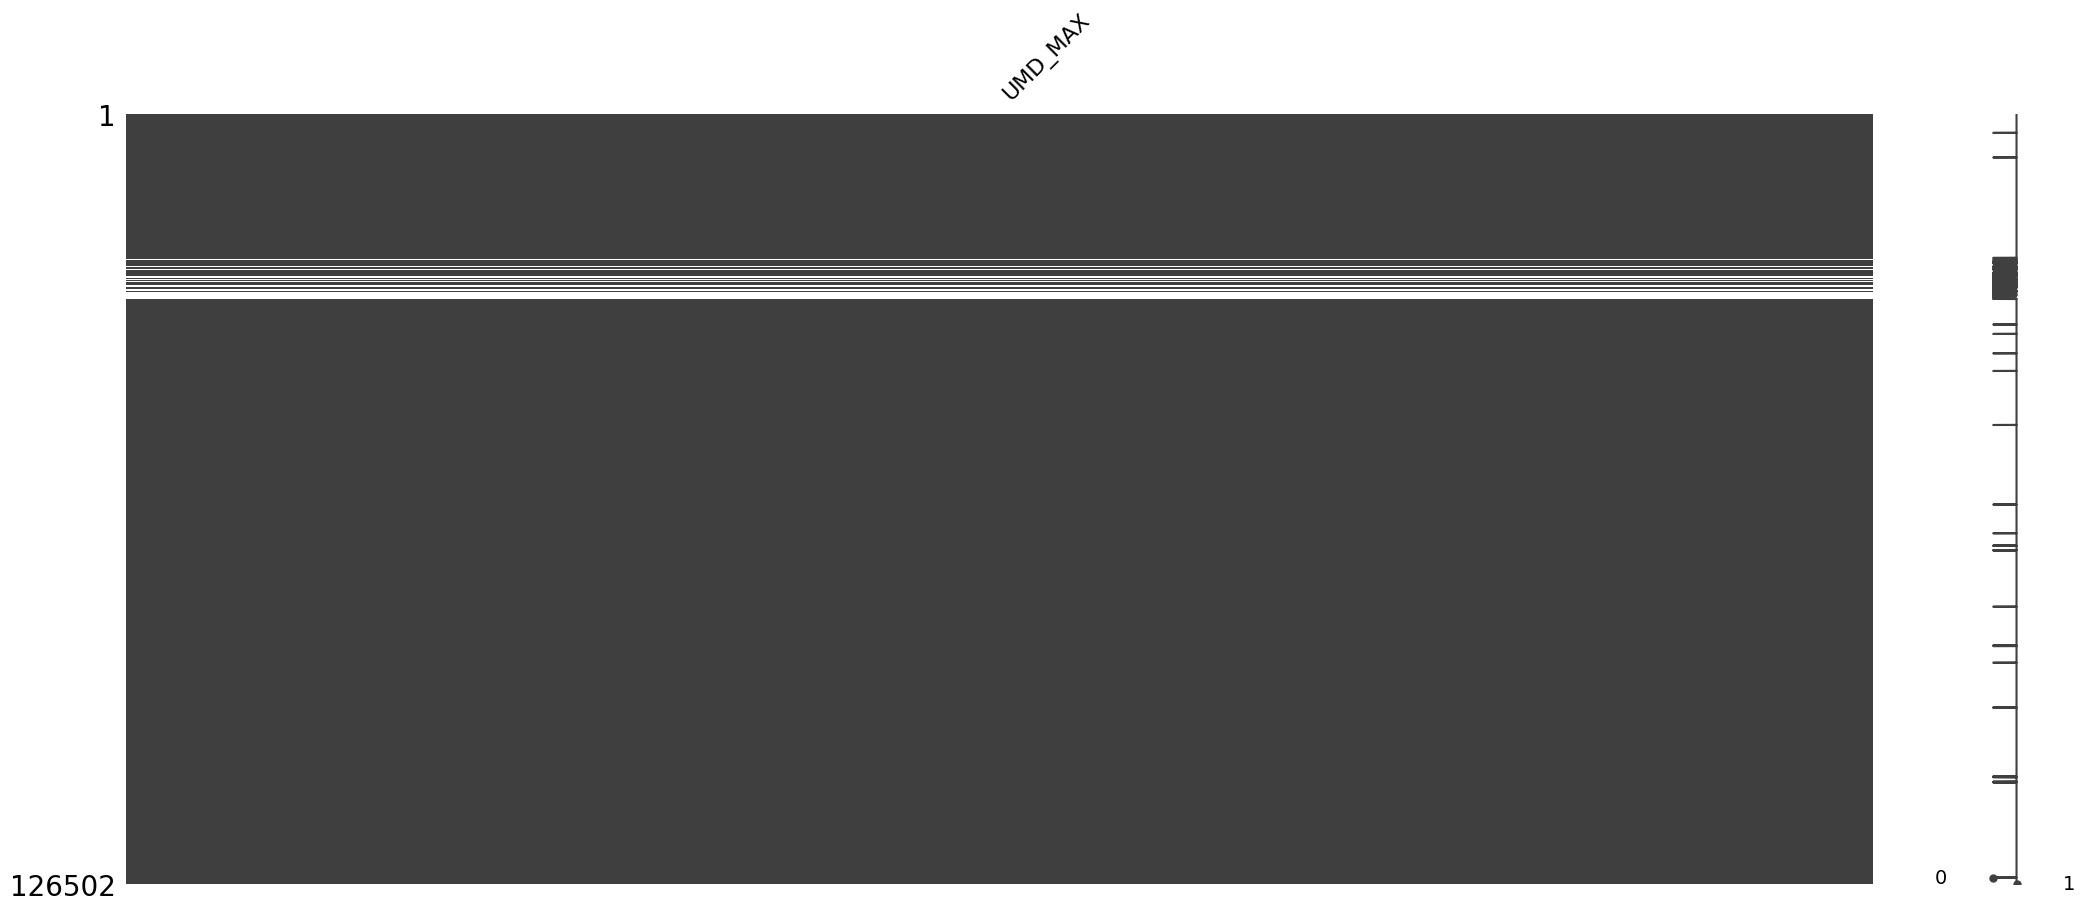

In [68]:
import missingno as msno

msno.matrix(df_a652[['UMD_MAX']])

In [23]:
df = pd.read_csv('../data/weather_stations/A652_2022_2023.csv')
df = df[~df.CHUVA.isna()]
df.DT_MEDICAO.tail()

11031    2023-04-05
11032    2023-04-05
11033    2023-04-05
11034    2023-04-05
11035    2023-04-05
Name: DT_MEDICAO, dtype: object

In [25]:
df[['DT_MEDICAO', 'HR_MEDICAO']].tail()

,DT_MEDICAO,HR_MEDICAO
11031,2023-04-05,1500
11032,2023-04-05,1600
11033,2023-04-05,1700
11034,2023-04-05,1800
11035,2023-04-05,1900


In [3]:
import pandas as pd
df1 = pd.read_csv('../data/weather_stations/A652_1997_2021.csv')
df2 = pd.read_csv('../data/weather_stations/A652_2022_2023.csv')
df3 = pd.concat([df1, df2])

print(df1.shape)
print(df2.shape)
print(df3.shape)

df3.to_csv('../data/weather_stations/A652_2007_2023.csv')

(219144, 28)
(11040, 28)
(230184, 28)


In [1]:
def format_time(input_str):
    '''
    This function first converts the input string to an integer using the int function. 
    It then extracts the hours and minutes from the input integer using integer division and modulus operations. 
    Finally, it formats the output string using f-strings to ensure that both hours and minutes are represented with two digits.
    Usage examples:
        print(format_time("100"))   # Output: "01:00"
        print(format_time("1200"))  # Output: "12:00"
        print(format_time("2300"))  # Output: "23:00"
    '''
    # Convert input string to integer
    input_int = int(input_str)
    
    # Extract hours and minutes from the input integer
    hours = input_int // 100
    minutes = input_int % 100
    
    # Format the output string
    output_str = f"{hours:02}:{minutes:02}"
    
    return output_str

In [17]:
import pandas as pd
df_A652_Sept2April = pd.read_csv('../data/weather_stations/A652_2007_2023.csv')
df_A652_Sept2April.HR_MEDICAO = df_A652_Sept2April.HR_MEDICAO.apply(format_time) # e.g., 1800 --> 18:00
timestamp = pd.to_datetime(df_A652_Sept2April.DT_MEDICAO + ' ' + df_A652_Sept2April.HR_MEDICAO)
df_A652_Sept2April = df_A652_Sept2April.set_index(pd.DatetimeIndex(timestamp))
df_A652_Sept2April = df_A652_Sept2April[~df_A652_Sept2April.CHUVA.isna()]
df_A652_Sept2April.shape

(137536, 29)

In [21]:
df_A652_Sept2April[df_A652_Sept2April.index.month.isin([9, 10, 11, 12, 1, 2, 3, 4, 5])].sort_index(ascending=True).shape

(102517, 29)

In [22]:
df_estiagem = df_A652_Sept2April[df_A652_Sept2April.index.month.isin([6,7,8])].sort_index(ascending=True)

In [23]:
df_estiagem[df_estiagem.CHUVA >= 25].CHUVA

2014-07-09    27.0
Name: CHUVA, dtype: float64

<AxesSubplot: >

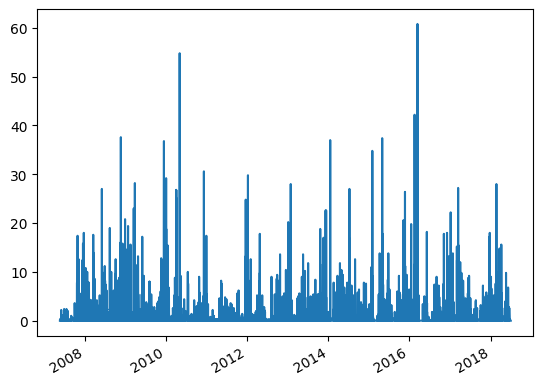

In [7]:
import pandas as pd
df_train = pd.read_parquet('../data/datasets/A652_E-N_EI_train.parquet.gzip')
df_train.CHUVA.plot()

<AxesSubplot: >

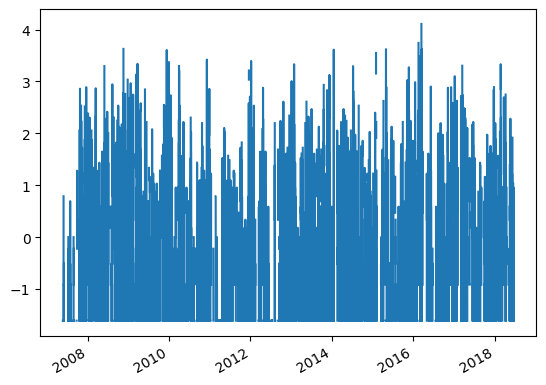

In [11]:
import numpy as np
df_train['CHUVA_logt'] = np.log(df_train[df_train.CHUVA >0].CHUVA)
df_train.CHUVA_logt.plot()

In [12]:
df_train.CHUVA_logt.describe()

count    8789.000000
mean       -0.536264
std         1.144059
min        -1.609438
25%        -1.609438
50%        -0.916291
75%         0.182322
max         4.107590
Name: CHUVA_logt, dtype: float64

In [10]:
df_train.CHUVA.describe()

count    96275.000000
mean         0.123889
std          0.961444
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         60.800000
Name: CHUVA, dtype: float64

In [4]:
import pandas as pd
df_SBGL = pd.read_csv('../data/sounding/SBGL_1997-01-01_2022-12-31.csv')

In [6]:
df_SBGL.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1025.0,42.0,20.0,15.6,100.0,7.0,-6.893654,1.215537e+00,SBGL,83746,2010-06-04,-22.81,-43.25,42.0,32.36
1,1021.0,70.0,20.4,14.4,98.0,8.0,-7.922145,1.113385e+00,SBGL,83746,2010-06-04,-22.81,-43.25,42.0,32.36
2,1000.0,219.0,19.0,15.3,90.0,12.0,-12.000000,-7.347881e-16,SBGL,83746,2010-06-04,-22.81,-43.25,42.0,32.36
3,969.0,489.0,16.6,15.2,86.0,16.0,-15.961025,-1.116104e+00,SBGL,83746,2010-06-04,-22.81,-43.25,42.0,32.36
4,925.0,885.0,14.6,13.1,80.0,22.0,-21.665771,-3.820260e+00,SBGL,83746,2010-06-04,-22.81,-43.25,42.0,32.36


In [8]:
df_SBGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006355 entries, 0 to 1006354
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   pressure        1006355 non-null  float64
 1   height          1003389 non-null  float64
 2   temperature     1003395 non-null  float64
 3   dewpoint        1002218 non-null  float64
 4   direction       961051 non-null   float64
 5   speed           961055 non-null   float64
 6   u_wind          961037 non-null   float64
 7   v_wind          961037 non-null   float64
 8   station         1006355 non-null  object 
 9   station_number  1006355 non-null  int64  
 10  time            1006355 non-null  object 
 11  latitude        1006355 non-null  float64
 12  longitude       1006355 non-null  float64
 13  elevation       1006355 non-null  float64
 14  pw              1006355 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 115.2+ MB


In [10]:
df_SBGL.time

0                   2010-06-04
1                   2010-06-04
2                   2010-06-04
3                   2010-06-04
4                   2010-06-04
                  ...         
1006350    2022-12-31 12:00:00
1006351    2022-12-31 12:00:00
1006352    2022-12-31 12:00:00
1006353    2022-12-31 12:00:00
1006354    2022-12-31 12:00:00
Name: time, Length: 1006355, dtype: object

In [3]:
import pandas as pd
df_SBGL_indices = pd.read_parquet('../data/sounding/SBGL_indices_1997-01-01_2022-12-31_preprocessed.parquet.gzip')
df_SBGL_indices.head()

,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,
2010-06-04,5.976469,-88.126376,-266.246931,25.900000,36.700000,6.503206
2010-06-08,0.000000,0.000000,-266.490535,-20.300000,23.200000,14.967601
2010-06-09,5.984759,-51.057503,-271.164870,7.900000,39.800000,7.232244
2010-06-10,20.304654,-61.525741,-267.094000,19.600000,35.900000,7.704037
2010-06-15,0.000000,0.000000,-263.269304,-6.145098,34.609804,9.162783


<AxesSubplot: >

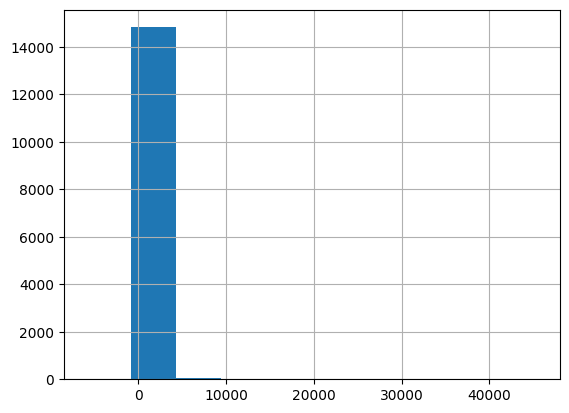

In [4]:
df_SBGL_indices.cape.hist()

In [5]:
min(df_SBGL_indices.cape), max(df_SBGL_indices.cape)

(-5951.740202988273, 45428.95988756999)

In [6]:
min(df_SBGL_indices.index), max(df_SBGL_indices.index)

(Timestamp('1997-01-01 00:00:00'), Timestamp('2022-12-31 12:00:00'))

In [25]:
df_from_2007 = df_SBGL_indices[df_SBGL_indices.index.year>=2007]
min(df_from_2007.index), max(df_from_2007.index)

(Timestamp('2007-01-01 00:00:00'), Timestamp('2022-12-31 12:00:00'))

In [34]:
df_from_2007.shape

(10084, 6)

<AxesSubplot: >

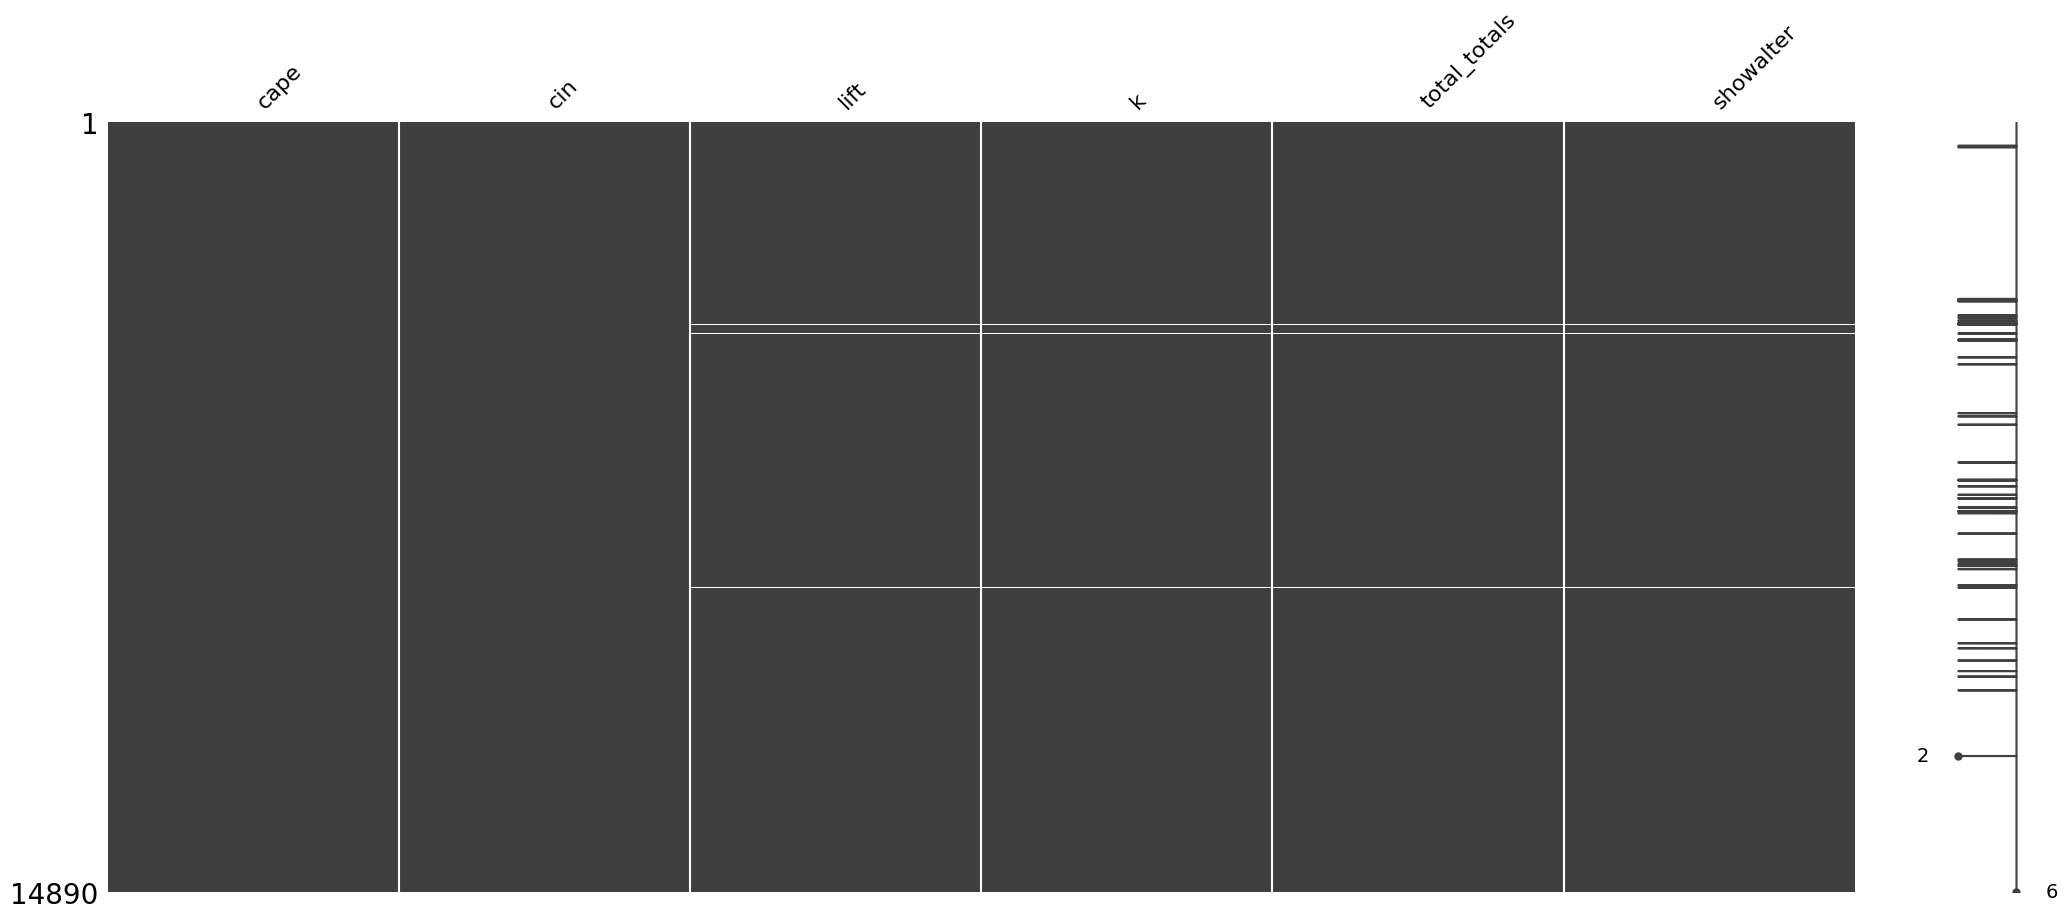

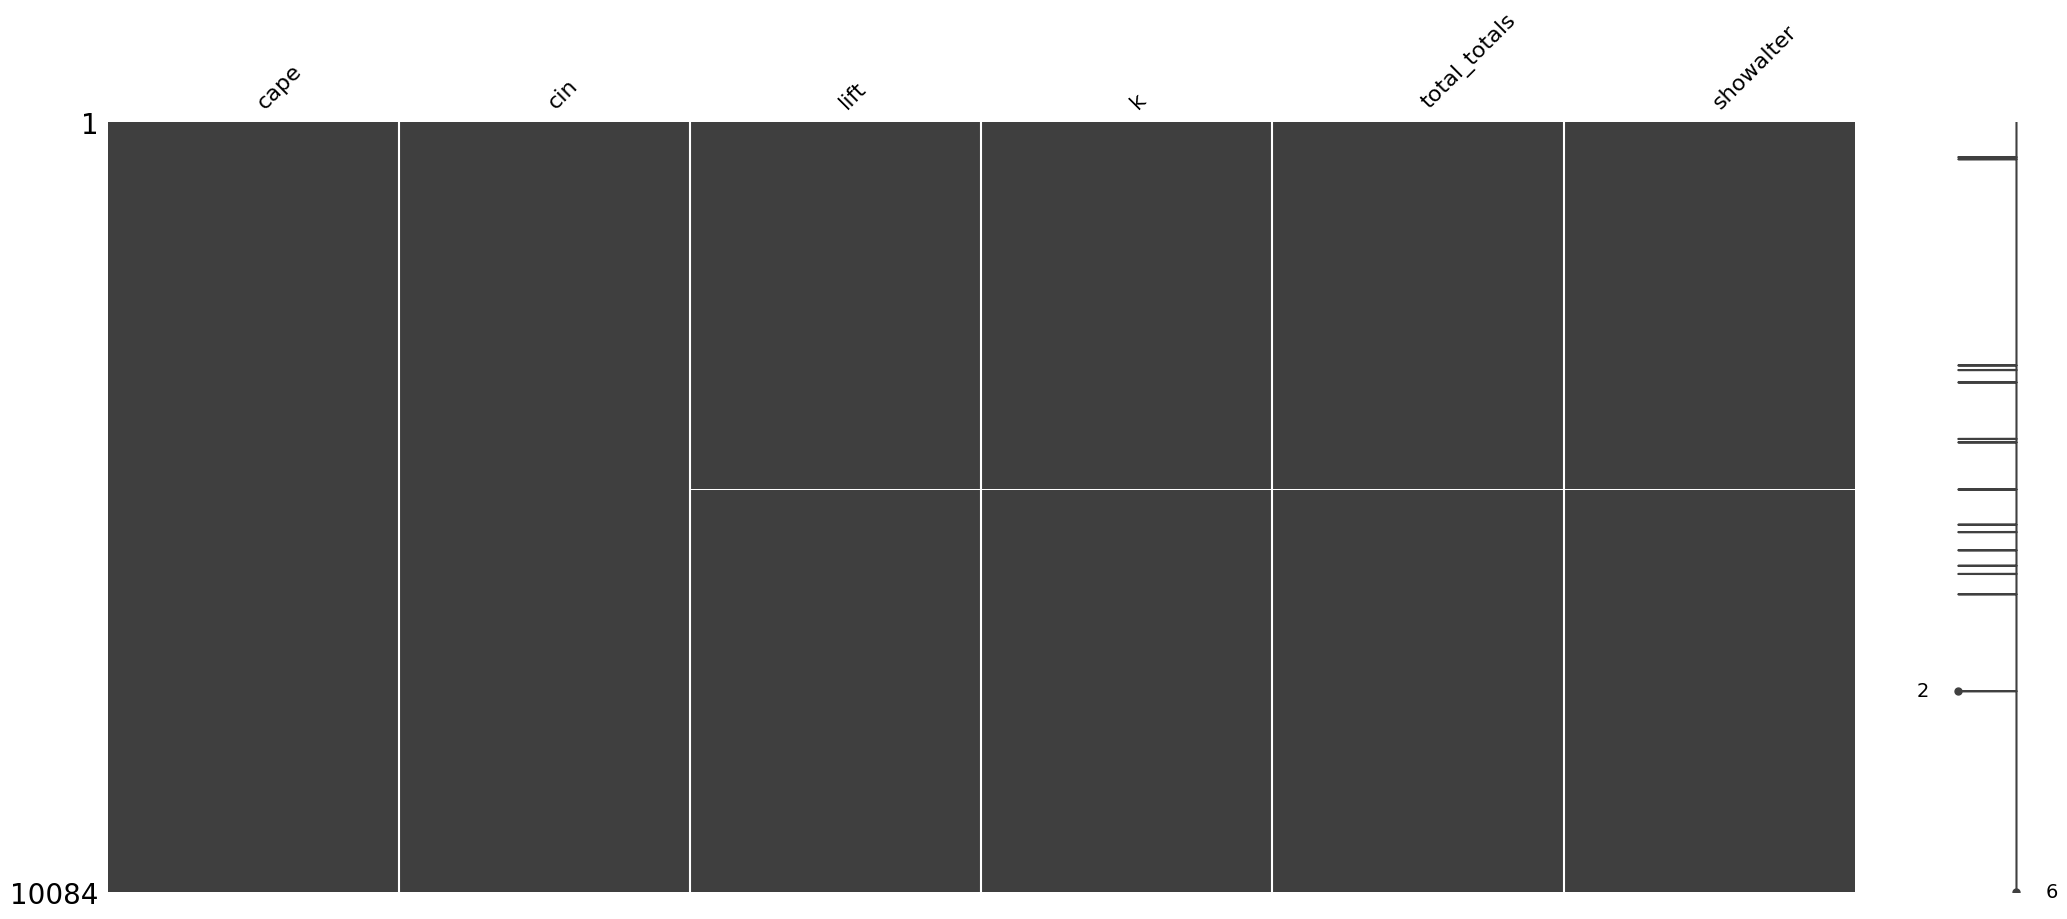

In [9]:
import missingno as msno 
msno.matrix(df_SBGL_indices)
msno.matrix(df_from_2007)

In [24]:
len(df_from_2007)

10084

<AxesSubplot: >

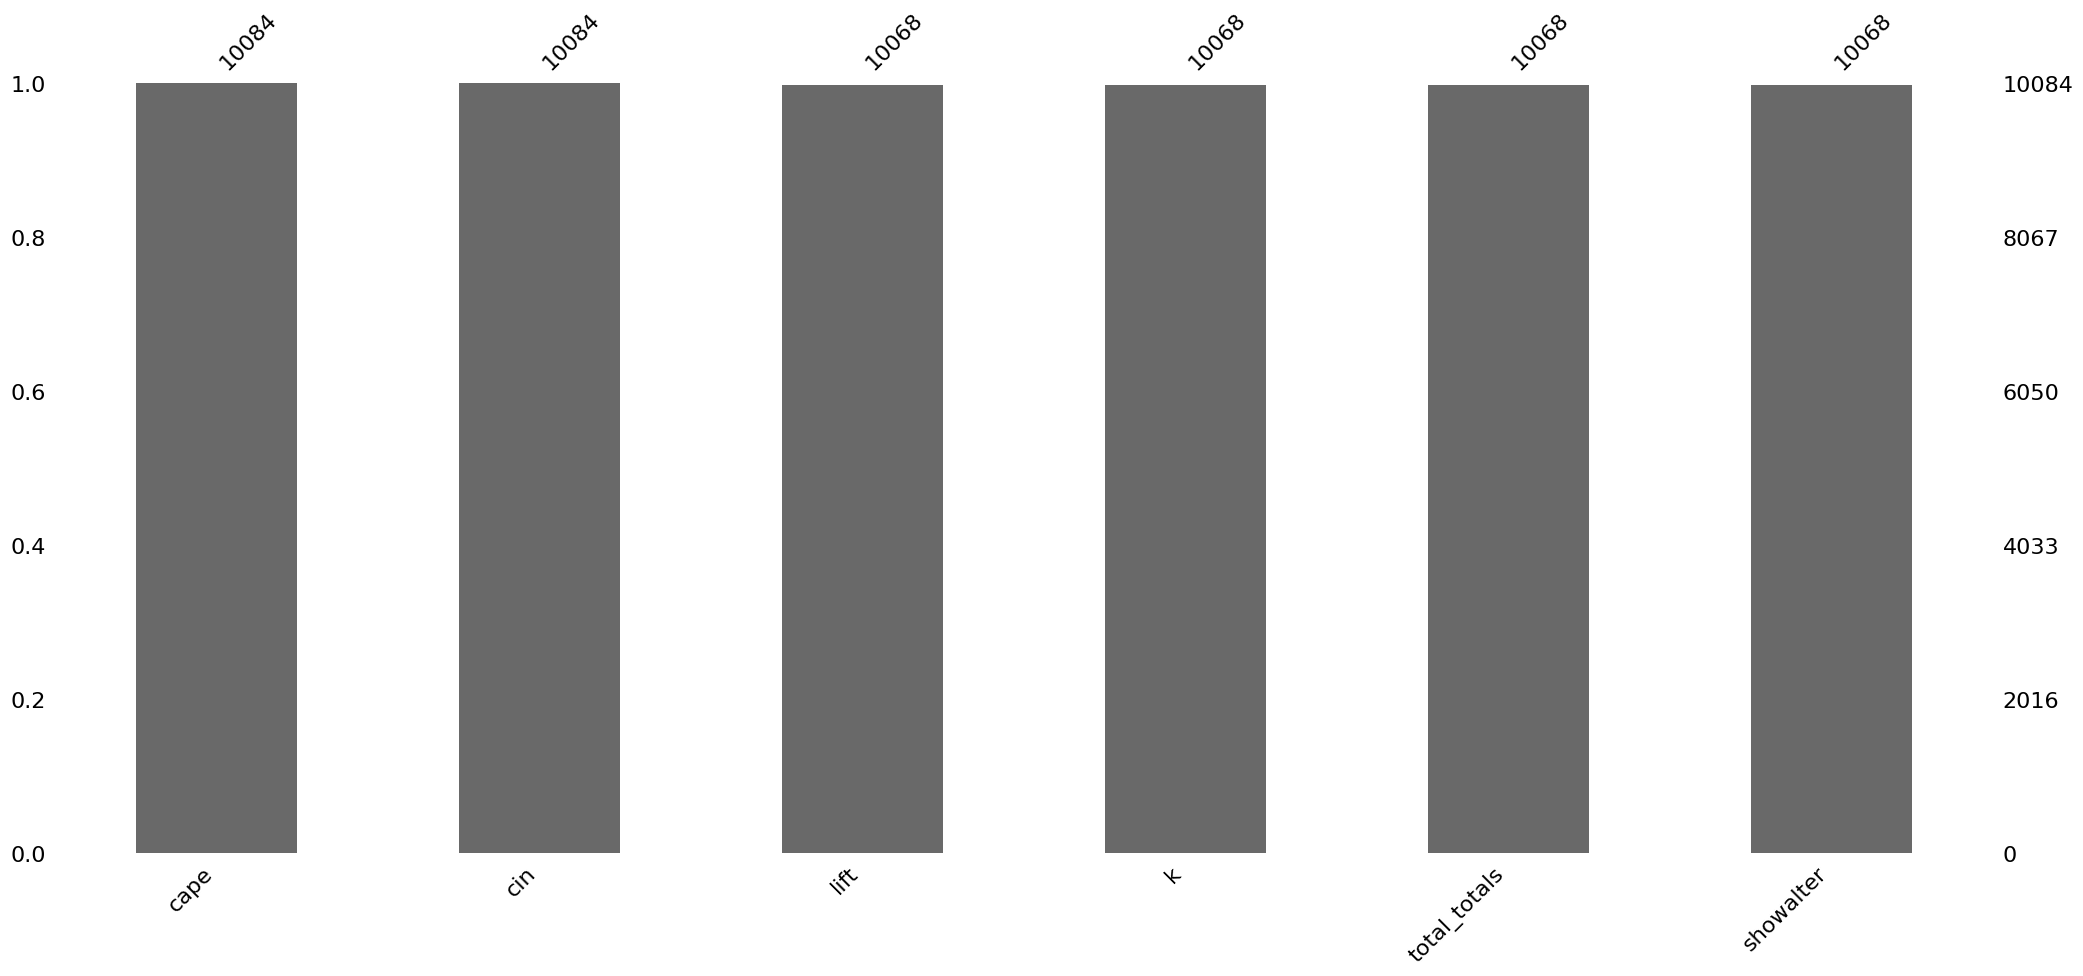

In [10]:
msno.bar(df_from_2007)

<AxesSubplot: >

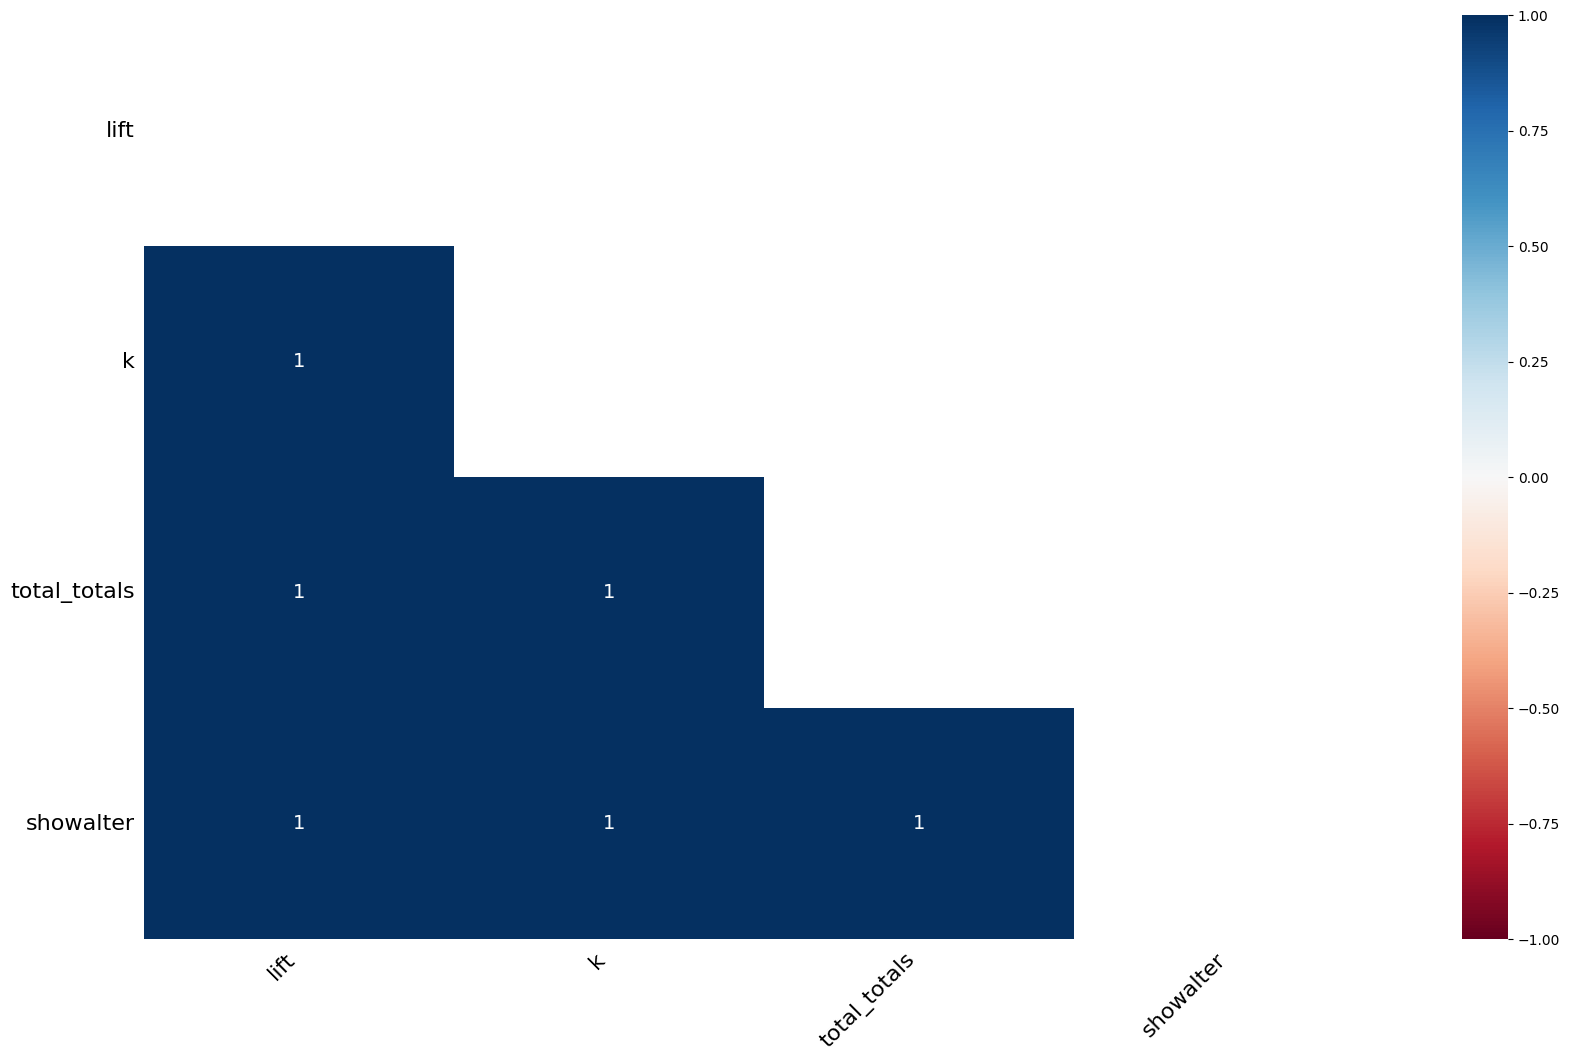

In [22]:
msno.heatmap(df_from_2007)

<AxesSubplot: >

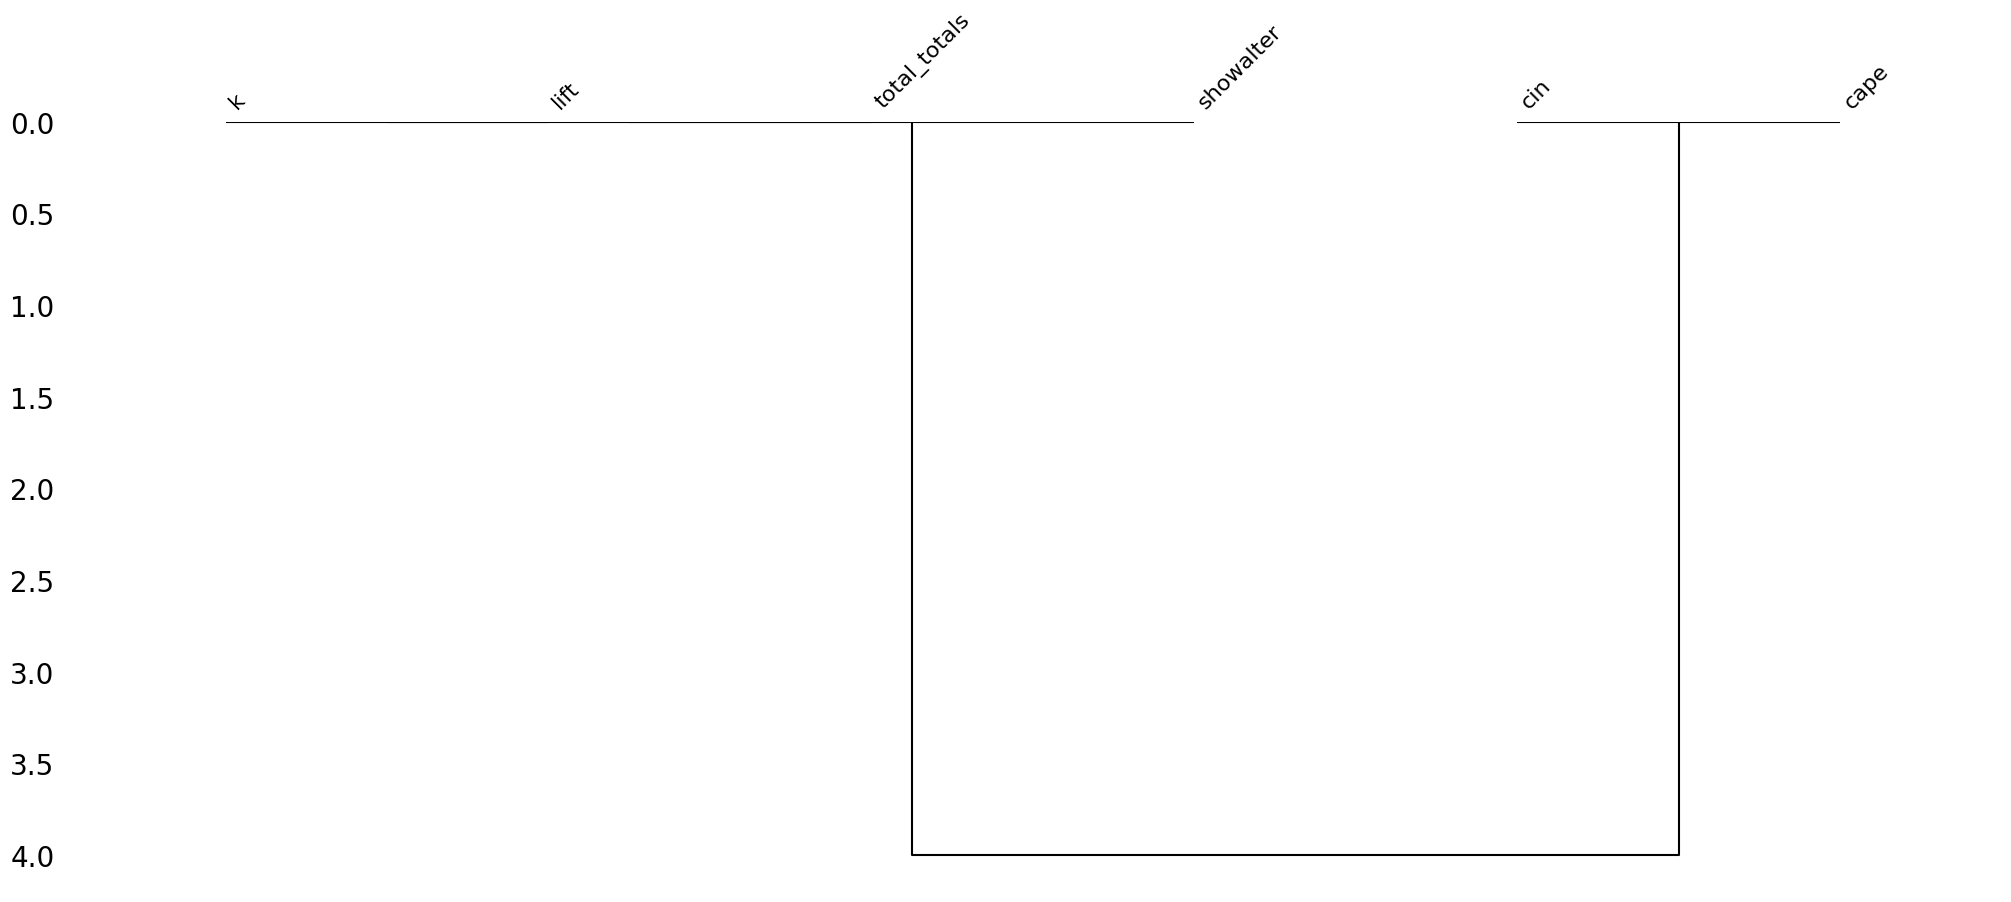

In [23]:
msno.dendrogram(df_from_2007)

In [28]:
base_year = 2007
current_year = 2022
expected_risings = ((current_year-base_year+1))*365*2
percent_working = ((expected_risings-10084)/expected_risings)*100
print(f"Aproximately {percent_working:.2f}% of SGBL expected risings events ({expected_risings}) did not happen since {base_year}.")

Aproximately 13.66% of SGBL expected risings events (11680) did not happen since 2007.


In [36]:
import datetime

start_datetime = datetime.datetime(2007, 1, 1, 0, 0, 0)  # lower datetime value
end_datetime = datetime.datetime(2022, 12, 31, 12, 0, 0)  # upper datetime value
step = datetime.timedelta(hours=12)  # step size

datetime_list = []
current_datetime = start_datetime
while current_datetime <= end_datetime:
    datetime_list.append(current_datetime)
    current_datetime += step
print(len(datetime_list))

11688


In [35]:
# Compute the set difference
diff = set(datetime_list) - set(df_from_2007.index)

# Convert the set back to a list
diff_list = list(diff)

# Print the result
print(len(diff_list))
print(sorted(diff_list))

1604
[datetime.datetime(2007, 1, 10, 0, 0), datetime.datetime(2007, 2, 21, 0, 0), datetime.datetime(2007, 2, 22, 12, 0), datetime.datetime(2007, 3, 25, 0, 0), datetime.datetime(2007, 4, 13, 12, 0), datetime.datetime(2007, 4, 21, 0, 0), datetime.datetime(2007, 4, 21, 12, 0), datetime.datetime(2007, 4, 22, 0, 0), datetime.datetime(2007, 4, 22, 12, 0), datetime.datetime(2007, 4, 23, 0, 0), datetime.datetime(2007, 4, 23, 12, 0), datetime.datetime(2007, 4, 24, 0, 0), datetime.datetime(2007, 4, 24, 12, 0), datetime.datetime(2007, 4, 28, 12, 0), datetime.datetime(2007, 5, 10, 0, 0), datetime.datetime(2007, 5, 10, 12, 0), datetime.datetime(2007, 5, 13, 0, 0), datetime.datetime(2007, 6, 12, 12, 0), datetime.datetime(2007, 6, 17, 0, 0), datetime.datetime(2007, 6, 17, 12, 0), datetime.datetime(2007, 7, 15, 0, 0), datetime.datetime(2007, 7, 15, 12, 0), datetime.datetime(2007, 7, 16, 0, 0), datetime.datetime(2007, 7, 16, 12, 0), datetime.datetime(2007, 10, 29, 12, 0), datetime.datetime(2007, 11, 2,

In [37]:
11688-1604

10084

In [38]:
1604/11688

0.13723477070499657

In [46]:
drought_period = [dt for dt in diff_list if not (dt.month > 4 and dt.month < 9)]

In [48]:
len(drought_period)

1047

In [49]:
1604*(8/12)

1069.3333333333333

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# generate example data
x1 = np.arange('2019-01-01', '2020-01-01', np.timedelta64(1, 'D')).astype('datetime64[s]')
y1 = np.random.rand(len(x1))
x2 = np.arange('2020-01-01', '2021-01-01', np.timedelta64(1, 'M')).astype('datetime64[s]')
y2 = np.random.rand(len(x2))

# create the plot
fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.plot(x2, y2)

# set x-axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Two Time Series with Different Resolutions')

# display the plot
plt.show()

ValueError: Could not convert object to NumPy timedelta

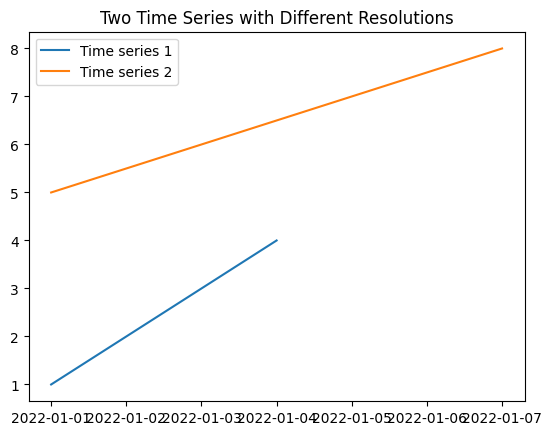

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Create two time series with different temporal resolutions
ts1 = pd.Series([1, 2, 3, 4], index=pd.date_range('2022-01-01', periods=4, freq='D'))
ts2 = pd.Series([5, 6, 7, 8], index=pd.date_range('2022-01-01', periods=4, freq='2D'))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the first time series
ax.plot(ts1.index, ts1.values, label='Time series 1')

# Plot the second time series
ax.plot(ts2.index, ts2.values, label='Time series 2')

# Add a legend and title to the plot
ax.legend()
ax.set_title('Two Time Series with Different Resolutions')

# Display the plot
plt.show()

In [55]:
df_from_2007.columns

Index(['cape', 'cin', 'lift', 'k', 'total_totals', 'showalter'], dtype='object')

In [63]:
sorted(df_from_2007.index)

[Timestamp('2007-01-01 00:00:00'),
 Timestamp('2007-01-01 12:00:00'),
 Timestamp('2007-01-02 00:00:00'),
 Timestamp('2007-01-02 12:00:00'),
 Timestamp('2007-01-03 00:00:00'),
 Timestamp('2007-01-03 12:00:00'),
 Timestamp('2007-01-04 00:00:00'),
 Timestamp('2007-01-04 12:00:00'),
 Timestamp('2007-01-05 00:00:00'),
 Timestamp('2007-01-05 12:00:00'),
 Timestamp('2007-01-06 00:00:00'),
 Timestamp('2007-01-06 12:00:00'),
 Timestamp('2007-01-07 00:00:00'),
 Timestamp('2007-01-07 12:00:00'),
 Timestamp('2007-01-08 00:00:00'),
 Timestamp('2007-01-08 12:00:00'),
 Timestamp('2007-01-09 00:00:00'),
 Timestamp('2007-01-09 12:00:00'),
 Timestamp('2007-01-10 12:00:00'),
 Timestamp('2007-01-11 00:00:00'),
 Timestamp('2007-01-11 12:00:00'),
 Timestamp('2007-01-12 00:00:00'),
 Timestamp('2007-01-12 12:00:00'),
 Timestamp('2007-01-13 00:00:00'),
 Timestamp('2007-01-13 12:00:00'),
 Timestamp('2007-01-14 00:00:00'),
 Timestamp('2007-01-14 12:00:00'),
 Timestamp('2007-01-15 00:00:00'),
 Timestamp('2007-01-

In [64]:
df_from_2007.head()

,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,
2010-06-04,5.976469,-88.126376,-266.246931,25.900000,36.700000,6.503206
2010-06-08,0.000000,0.000000,-266.490535,-20.300000,23.200000,14.967601
2010-06-09,5.984759,-51.057503,-271.164870,7.900000,39.800000,7.232244
2010-06-10,20.304654,-61.525741,-267.094000,19.600000,35.900000,7.704037
2010-06-15,0.000000,0.000000,-263.269304,-6.145098,34.609804,9.162783


In [65]:
df_from_2007_sorted = df_from_2007.sort_index()
df_from_2007_sorted.head()

,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,
2007-01-01 00:00:00,185.019561,-28.038922,-273.215568,35.2,40.7,2.222814
2007-01-01 12:00:00,0.000000,0.000000,-268.987126,30.0,37.7,4.370680
2007-01-02 00:00:00,44.034777,-4.499495,-273.627053,34.2,42.8,1.679807
2007-01-02 12:00:00,0.000000,0.000000,-270.616917,31.4,41.1,2.415679
2007-01-03 00:00:00,2.331306,-212.048253,-272.712126,39.0,45.9,-1.521224


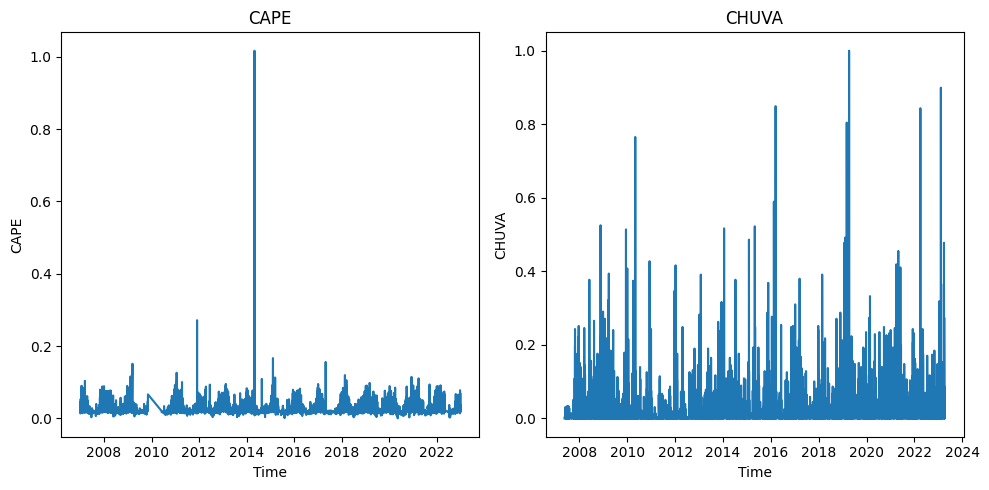

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

normalized_cape = (df_from_2007_sorted.cape - min(df_from_2007_sorted.cape))/max(df_from_2007_sorted.cape)
normalized_precipitation = (df_ws.CHUVA - min(df_ws.CHUVA))/max(df_ws.CHUVA)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(df_from_2007_sorted.index, normalized_cape, label='cape')
axs[0].set_title('CAPE')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('CAPE')

axs[1].plot(df_ws.index, normalized_precipitation, label='precipitation')
axs[1].set_title('CHUVA')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('CHUVA')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

In [88]:
cape = df_from_2007_sorted.cape
precipitation_gtz = df_ws[df_ws.CHUVA > 0].CHUVA
precipitation_gtz.corr(cape)

-0.017307643543421704

In [92]:
precipitation_gtz['2007-01-01':'2022-12-31'].sort_index()

2007-05-23 16:00:00    0.4
2007-05-23 22:00:00    0.2
2007-05-24 06:00:00    0.2
2007-05-24 08:00:00    0.2
2007-05-24 11:00:00    0.2
                      ... 
2022-12-30 20:00:00    3.4
2022-12-30 21:00:00    2.2
2022-12-30 22:00:00    1.2
2022-12-31 00:00:00    0.2
2022-12-31 03:00:00    0.2
Name: CHUVA, Length: 11737, dtype: float64

In [ ]:
precipitation_gtz['2007-01-01':'2022-12-31'].sort_index()

In [95]:
precipitation_gtz['2007-01-01':'2022-12-31'].sort_index().corr(cape.sort_index())

-0.017307643543421704

In [67]:
df_ws = pd.read_parquet('../data/gauge/A652_2007_2023_preprocessed.parquet.gzip')

In [68]:
df_ws.columns

Index(['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'hour_sin',
       'hour_cos', 'CHUVA'],
      dtype='object')

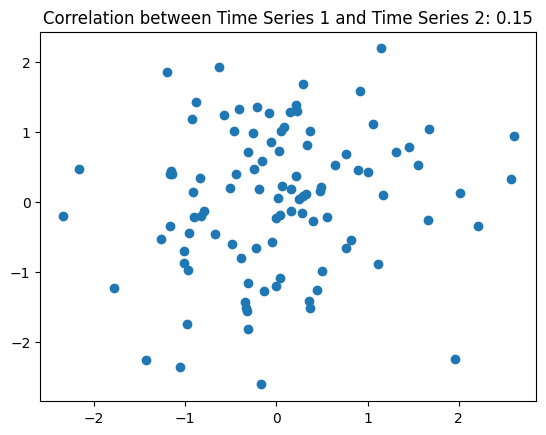

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Create two time series
ts1 = np.random.randn(100)
ts2 = np.random.randn(100)

# Calculate the correlation coefficient
corr_coef = np.corrcoef(ts1, ts2)[0, 1]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the scatter plot
ax.scatter(ts1, ts2)

# Add a title and correlation coefficient as text to the plot
ax.set_title(f'Correlation between Time Series 1 and Time Series 2: {corr_coef:.2f}')

# Display the plot
plt.show()

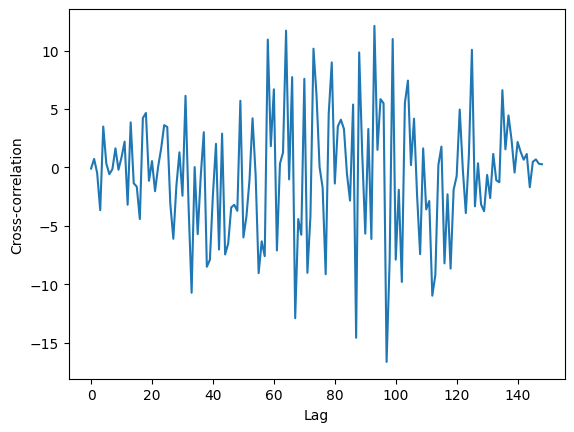

In [78]:
import numpy as np

# create two time series with different temporal resolutions
ts1 = np.random.randn(100)
ts2 = np.random.randn(50)

# calculate cross-correlation using numpy
cross_corr = np.correlate(ts1, ts2, mode='full')

# plot cross-correlation function
import matplotlib.pyplot as plt
plt.plot(cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.show()
